# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ("../Resources/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Define variables to hold city data collected - from list below - ("Export the city data into a .csv.")
local_cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

# Initialize city and group index counters
record_index = 0
set_index = 1

# use list of units
units = ["imperial"]

# Save config information - (Burundi lesson)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Check on the weather in each city using a series of successive API calls
print("------------------------------")
print("Beginning Data Retrieval")
print("------------------------------")

# loop throught the list of cities and append them to list
for city in cities:
    
    # Build query URL based on current element in units
    query_url = url + "&q=" + city
    
    # Get weather information for each city
    response = requests.get(query_url).json()
    
    if record_index < 50:
        record_index += 1
        
    else:
        set_index += 1
        record_index = 1

    print("Processing record {} of set {} | {}".format(record_index, set_index, city))

    # get weather detailed information for each city and use error wrapper - (MakingExceptions lesson--try/except block)

    try:

        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind.append(response["wind"]["speed"])
        local_cities.append(city)
        
    except:
        print("City not found!")
        pass

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

------------------------------
Beginning Data Retrieval
------------------------------
Processing record 1 of set 1 | dikson
Processing record 2 of set 1 | bredasdorp
Processing record 3 of set 1 | khatanga
Processing record 4 of set 1 | barrow
Processing record 5 of set 1 | adrar
Processing record 6 of set 1 | avarua
Processing record 7 of set 1 | cape town
Processing record 8 of set 1 | ponta do sol
Processing record 9 of set 1 | rikitea
Processing record 10 of set 1 | jati
Processing record 11 of set 1 | kemijarvi
City not found!
Processing record 12 of set 1 | petropavlovsk-kamchatskiy
Processing record 13 of set 1 | kapaa
Processing record 14 of set 1 | kaitangata
Processing record 15 of set 1 | sambava
Processing record 16 of set 1 | kruisfontein
Processing record 17 of set 1 | college
Processing record 18 of set 1 | fort saint john
City not found!
Processing record 19 of set 1 | albany
Processing record 20 of set 1 | bubaque
Processing record 21 of set 1 | wattegama
Processing r

Processing record 42 of set 4 | sidmouth
Processing record 43 of set 4 | puksoozero
Processing record 44 of set 4 | shiyan
Processing record 45 of set 4 | okakarara
Processing record 46 of set 4 | vila velha
Processing record 47 of set 4 | olafsvik
Processing record 48 of set 4 | bagn
Processing record 49 of set 4 | inhambane
Processing record 50 of set 4 | santarem
Processing record 1 of set 5 | geraldton
Processing record 2 of set 5 | marcona
City not found!
Processing record 3 of set 5 | beringovskiy
Processing record 4 of set 5 | laguna
Processing record 5 of set 5 | nouadhibou
Processing record 6 of set 5 | talagang
Processing record 7 of set 5 | ponta delgada
Processing record 8 of set 5 | nelson bay
Processing record 9 of set 5 | khandyga
Processing record 10 of set 5 | alta
Processing record 11 of set 5 | sao borja
Processing record 12 of set 5 | orlik
Processing record 13 of set 5 | bengkulu
Processing record 14 of set 5 | san ramon de la nueva oran
Processing record 15 of set

Processing record 39 of set 8 | rio grande
Processing record 40 of set 8 | zlatoustovsk
City not found!
Processing record 41 of set 8 | marawi
Processing record 42 of set 8 | tashtagol
Processing record 43 of set 8 | fortuna
Processing record 44 of set 8 | mayo
Processing record 45 of set 8 | saryshagan
City not found!
Processing record 46 of set 8 | gasa
Processing record 47 of set 8 | hihifo
City not found!
Processing record 48 of set 8 | lima
Processing record 49 of set 8 | port shepstone
Processing record 50 of set 8 | tromso
Processing record 1 of set 9 | uige
Processing record 2 of set 9 | aklavik
Processing record 3 of set 9 | pisco
Processing record 4 of set 9 | leh
Processing record 5 of set 9 | cockburn town
Processing record 6 of set 9 | elban
Processing record 7 of set 9 | paita
Processing record 8 of set 9 | los llanos de aridane
Processing record 9 of set 9 | yuxia
Processing record 10 of set 9 | alofi
Processing record 11 of set 9 | kuryk
Processing record 12 of set 9 | 

Processing record 30 of set 12 | victoria
Processing record 31 of set 12 | santa rosa
Processing record 32 of set 12 | agartala
Processing record 33 of set 12 | simpang
Processing record 34 of set 12 | charyshskoye
Processing record 35 of set 12 | orsha
Processing record 36 of set 12 | hami
Processing record 37 of set 12 | vanimo
Processing record 38 of set 12 | barabai
Processing record 39 of set 12 | ballina
Processing record 40 of set 12 | baherden
Processing record 41 of set 12 | rock sound
Processing record 42 of set 12 | pingliang
Processing record 43 of set 12 | judenburg
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Export the city data into a .csv - cities, cloudiness, country, date, humidity, lat/lng, temperature  and wind speed
# lesson: PANDAS 4.1.03 creating_data_frames 11-26-2019

city_weather = {
    "City": local_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Max Temp": temp,    
    "Lat" : lat,
    "Lng" : lng,  
    "Wind Speed" : wind
}


# Create the dataframe
city_weather_df = pd.DataFrame(city_weather)

# save the dataframe into a .csv file
city_weather_df.to_csv("../Resources/weather-across-the-globe.csv")
                       

# Display the dataframe
city_weather_df.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Max Temp      545
Lat           545
Lng           545
Wind Speed    545
dtype: int64

In [22]:
# Display a sampling of weather in cities across the globe
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Lat,Lng,Wind Speed
0,dikson,97,RU,1579851830,95,-8.91,73.51,80.55,11.77
1,bredasdorp,58,ZA,1579851830,60,75.00,-34.53,20.04,12.75
2,khatanga,100,RU,1579851830,88,-26.75,71.97,102.50,7.83
3,barrow,1,US,1579851830,68,-18.40,71.29,-156.79,6.93
4,adrar,100,MR,1579851830,19,71.24,20.50,-10.07,13.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

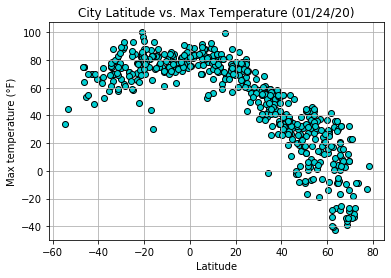

In [23]:
# City Latitude vs Max Temperature
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", edgecolors="black", facecolors="darkturquoise")

# Format the plot title and axis labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max temperature (°F)")
plt.grid()

# save the image in a .png file
plt.savefig("../Images/CityLatitudeVsMaxTemperature.png")

#Display the graph
plt.show()

#### Latitude vs. Humidity Plot

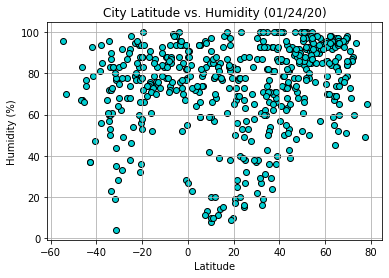

In [24]:
# City Latitude vs Humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", edgecolors="black", facecolors="darkturquoise")

# Format the plot title and axis labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# save the image in a .png file
plt.savefig("../Images/CityLatitudeVsHumidity.png")

#Display the graph
plt.show()

#### Latitude vs. Cloudiness Plot

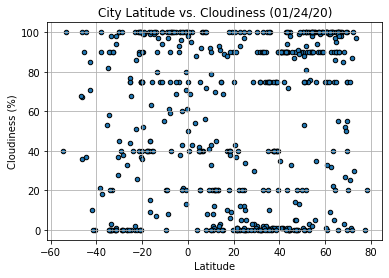

In [25]:
# City Latitude vs Cloudiness
city_weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", edgecolors="black",facecolors="darkturquoise")

# Format the plot title and axis labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# save the image in a .png file
plt.savefig("../Images/LatitudeVsCloudiness.png")

#Display the graph
plt.show()

In [ ]:
Code Analysis: City Latitude vs. Cloudiness
The code written for this analysis closely resembles the code used to generate the first chart on maximum temperatures.
The comparison chart generated above, between location and cloudiness condition show wide dispersion
    based on city location in the globe, even considering conditions of extreme cloudiness and zero cloudiness.
If bright skies are a pre-condition to visiting a city, there are may cities in this sample that have levels
    of cloudiness that are 20% or below. Break out the suntan lotion! 

#### Latitude vs. Wind Speed Plot

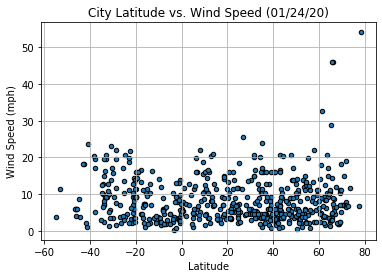

In [26]:
# City Latitude vs Wind Speed
city_weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o", edgecolors="black",facecolors="darkturquoise")

# Format the plot title and axis labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# save the image in a .png file
plt.savefig("../Images/CityLatitudeVsWindSpeed.png")

#Display the graph
plt.show()

In [ ]:
Code Analysis: City Latitude vs. Wind Speed
The code written for this analysis closely resembles the code used to generate the first chart on maximum temperatures.
The comparison chart generated above, show most cities have wind speeds falling below 10 mph, and a majority having wind sppeds
    below 15 mph.
There are a few outlier cities where wind gust to over 25 mph and where skirts, hats and toupees are best secured tightly.

## Linear Regression

The r-squared is: -0.7837940718097843


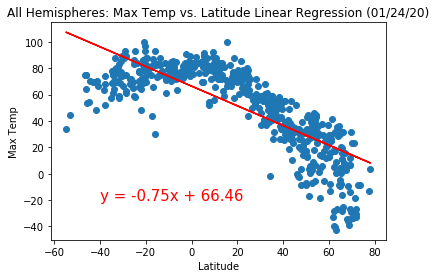

In [27]:
# OPTIONAL: Create a function to create Linear Regression plots

## Convert to floats and store Latitude and Max Temperature as x and y values
x_values = city_weather_df["Lat"].astype("float")
y_values = city_weather_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,-20),fontsize=15,color="red")

# Label plot
plt.title("All Hemispheres: Max Temp vs. Latitude Linear Regression (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save the image in a .png file
plt.savefig("../Images/AllHem_LinearReg_MaxTemp_vs_Lat.png")

# Show plot
plt.show()

In [29]:
# Set data *******************
# Create dataframe of cities by hemisphhere
# Northern Hemisphere:
northern_cities = (city_weather_df["Lat"].astype("float") >= 0)
northern_cities_df = city_weather_df[northern_cities] 

# Southern Hemisphere:
southern_cities = (city_weather_df["Lat"].astype("float") < 0)
southern_cities_df = city_weather_df[southern_cities] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8780222463675602


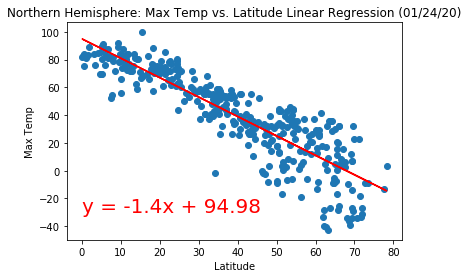

In [30]:

## Convert to floats and store Latitude and Max Temperature as x and y values
x_values = northern_cities_df["Lat"].astype("float")
y_values = northern_cities_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=20,color="red")

# Label plot
plt.title("Northern Hemisphere: Max Temp vs. Latitude Linear Regression (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save the image in a .png file
plt.savefig("../Images/NorHem_LinearReg_MaxTemp_vs_Lat.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.40691268319776663


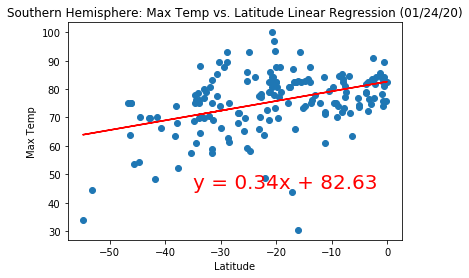

In [31]:
## Convert to floats and store Latitude and Max Temperature as x and y values
x_values = southern_cities_df["Lat"].astype("float")
y_values = southern_cities_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,45),fontsize=20,color="red")

# Label plot
plt.title("Southern Hemisphere: Max Temp vs. Latitude Linear Regression (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save the image in a .png file
plt.savefig("../Images/SoHem_LinearReg_MaxTemp_vs_Lat.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3492147935451688


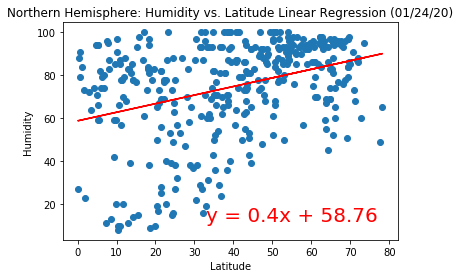

In [32]:
## Convert to floats and store Latitude and Humidity as x and y values
x_values = northern_cities_df["Lat"].astype("float")
y_values = northern_cities_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33,12),fontsize=20,color="red")

# Label plot
plt.title("Northern Hemisphere: Humidity vs. Latitude Linear Regression (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save the image in a .png file
plt.savefig("../Images/NorHem_LinearReg_Humidity_vs_Lat.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2940183660360839


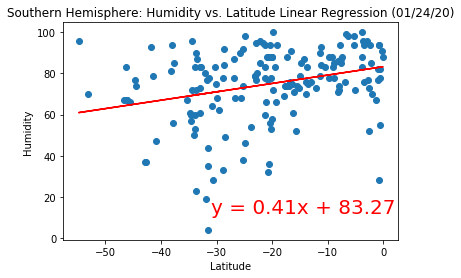

In [33]:
## Convert to floats and store Latitude and Humidity as x and y values
x_values = southern_cities_df["Lat"].astype("float")
y_values = southern_cities_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-31, 12),fontsize=20,color="red")

# Label plot
plt.title("Southern Hemisphere: Humidity vs. Latitude Linear Regression (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save the image in a .png file
plt.savefig("../Images/SoHem_LinearReg_Humidity_vs_Lat.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27980469504588407


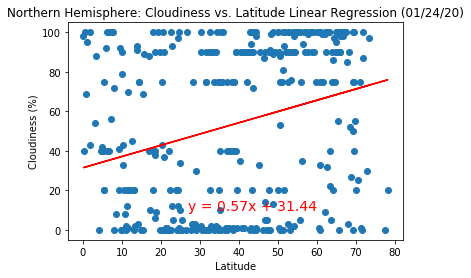

In [34]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = northern_cities_df["Lat"].astype("float")
y_values = northern_cities_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(27,10),fontsize=14,color="red")

# Label plot
plt.title("Northern Hemisphere: Cloudiness vs. Latitude Linear Regression (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save the image in a .png file
plt.savefig("../Images/NorHem_LinearReg_Cloudiness_vs_Lat.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2588020869622448


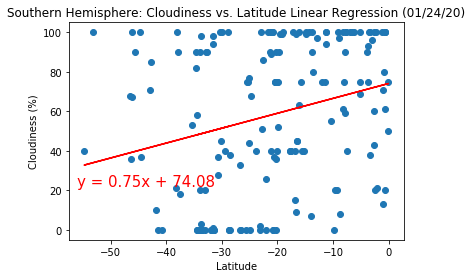

In [35]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = southern_cities_df["Lat"].astype("float")
y_values = southern_cities_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56, 22),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere: Cloudiness vs. Latitude Linear Regression (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save the image in a .png file
plt.savefig("../Images/SoHem_LinearReg_Cloudiness_vs_Lat.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.040217809052115056


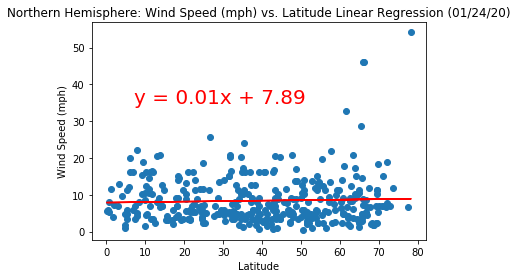

In [36]:
## Convert to floats and store Latitude and  Wind Speed as x and y values
x_values = northern_cities_df["Lat"].astype("float")
y_values = northern_cities_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7, 35),fontsize=20,color="red")

# Label plot
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save the image in a .png file
plt.savefig("../Images/NorHem_LinearReg_WindSpeed_vs_Lat.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3016051437348318


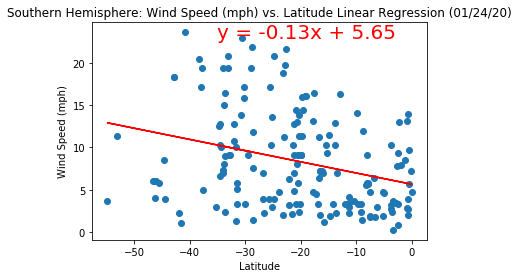

In [37]:
## Convert to floats and store Latitude and  Wind Speed as x and y values
x_values = southern_cities_df["Lat"].astype("float")
y_values = southern_cities_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35, 23),fontsize=20,color="red")

# Label plot
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save the image in a .png file
plt.savefig("../Images/SoHem_LinearReg_WindSpeed_vs_Lat.png")

# Show plot
plt.show()